## Importation des librairies

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importation du jeu de données

In [49]:
chain = pd.read_excel(r"D:\Projects\IT\Data Science & IA\Developpement_Tableau_de_Bord_de_la_Chaine_Approvisionnement_Power_BI\data\supply-chain.xlsx")
print("Jeu de données importé ✅✅")
chain

Jeu de données importé ✅✅


,Delivery Status,Stock Level,Sales,Transportation Cost,Restock Needed,Region,Delivery Urgency,Estimated_day
0,Late,55,45,644.92,Yes,East,On Time,17
1,On time,77,18,440.75,No,South,On Time,17
2,Late,97,16,310.18,No,West,Late,9
3,On time,136,25,213.36,No,North,On Time,17
4,On time,175,25,832.97,No,North,On Time,17
...,...,...,...,...,...,...,...,...
695,Missing,50,31,943.21,Yes,South,Late,13
696,On time,155,33,681.76,No,West,On Schedule,9
697,Late,63,23,735.38,No,West,On Time,17
698,Late,166,22,284.31,No,East,On Time,17


## Affichage des valeurs manquantes 

<Axes: >

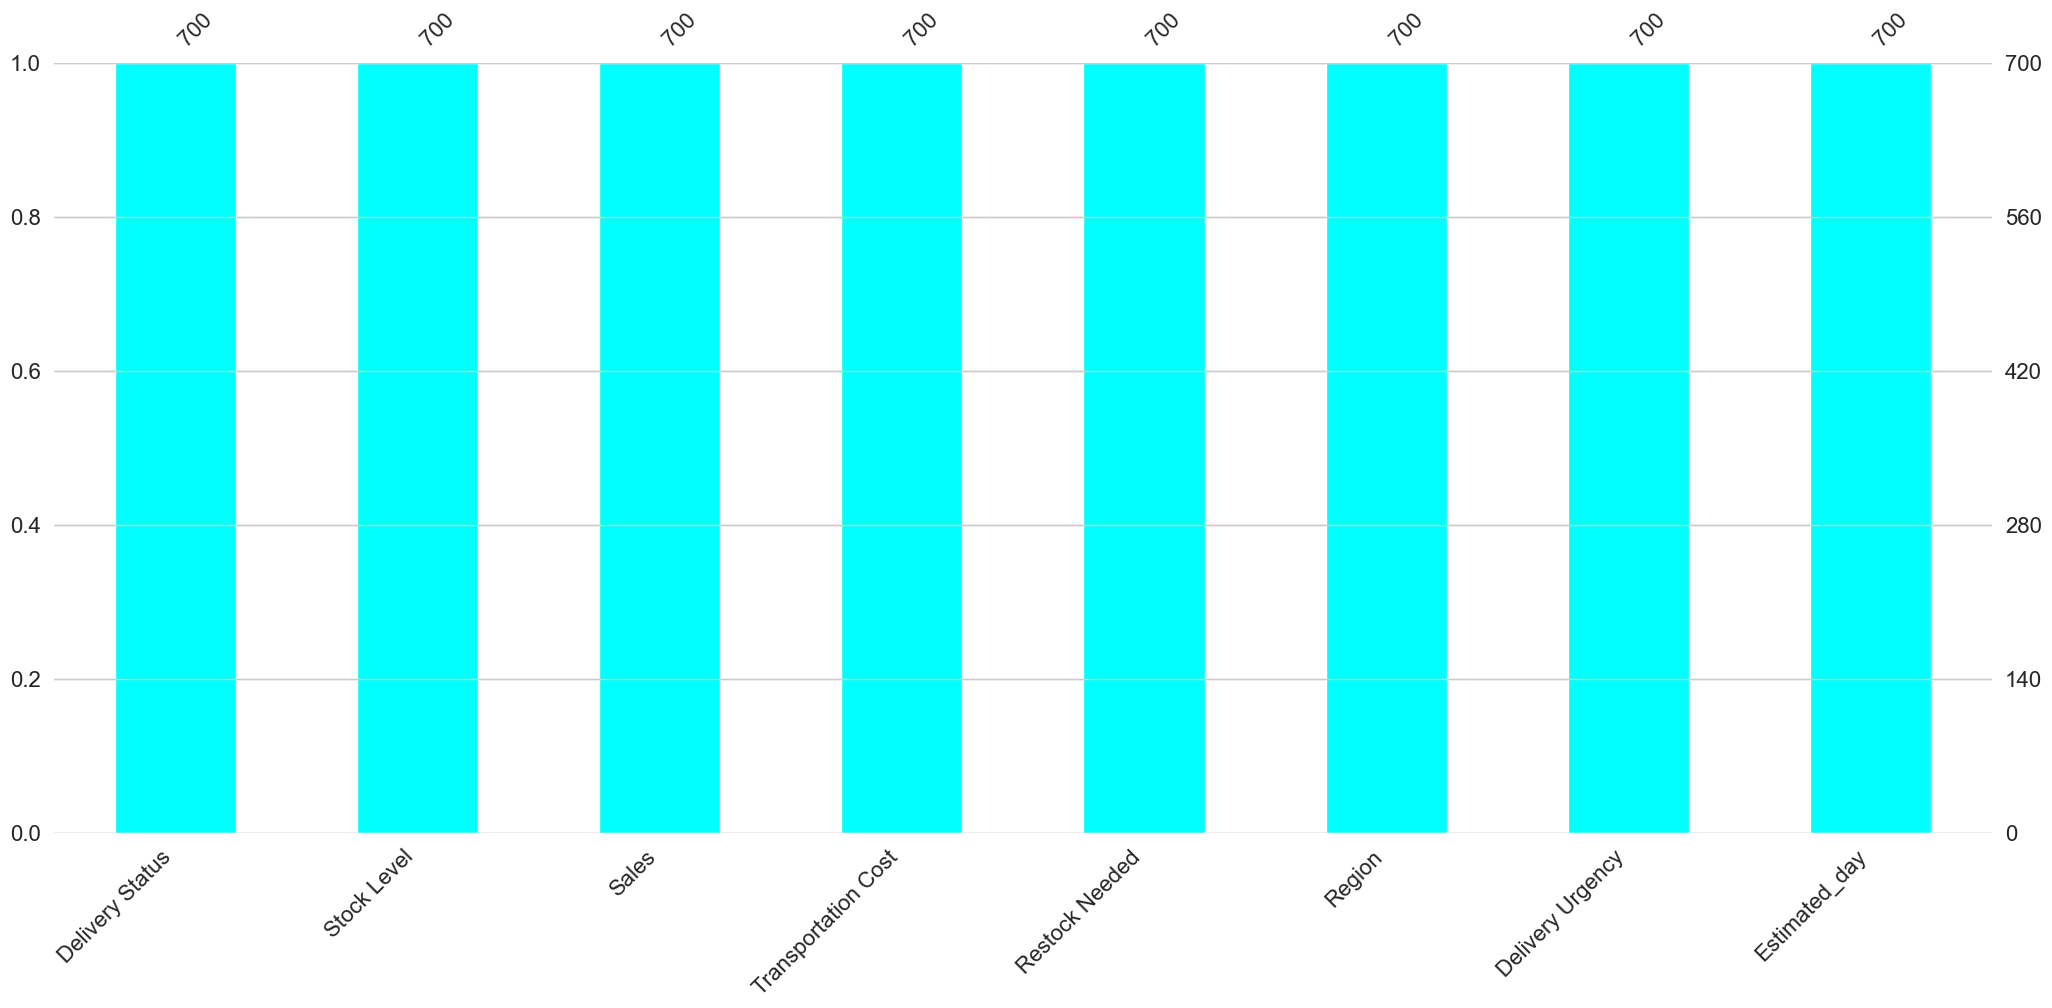

In [ ]:
msno.bar(chain, color="cyan")

## Affichage des doublons

In [58]:
# Vérification des doublons
doublons = chain.duplicated().sum()
if doublons == 0: 
    print("Pas de doublons")
else : 
    print(f"Doublons détectés : {doublons} lignes en double")

Pas de doublons


## Set Up

In [51]:
sns.set(style="whitegrid")

# Sélection des types de données
num_col = chain.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_col = chain.select_dtypes(include=["object"]).columns.difference(["Delivery Status"]).tolist()

# Cible = Target 
target = chain["Delivery Status"]

## Analyse univariée

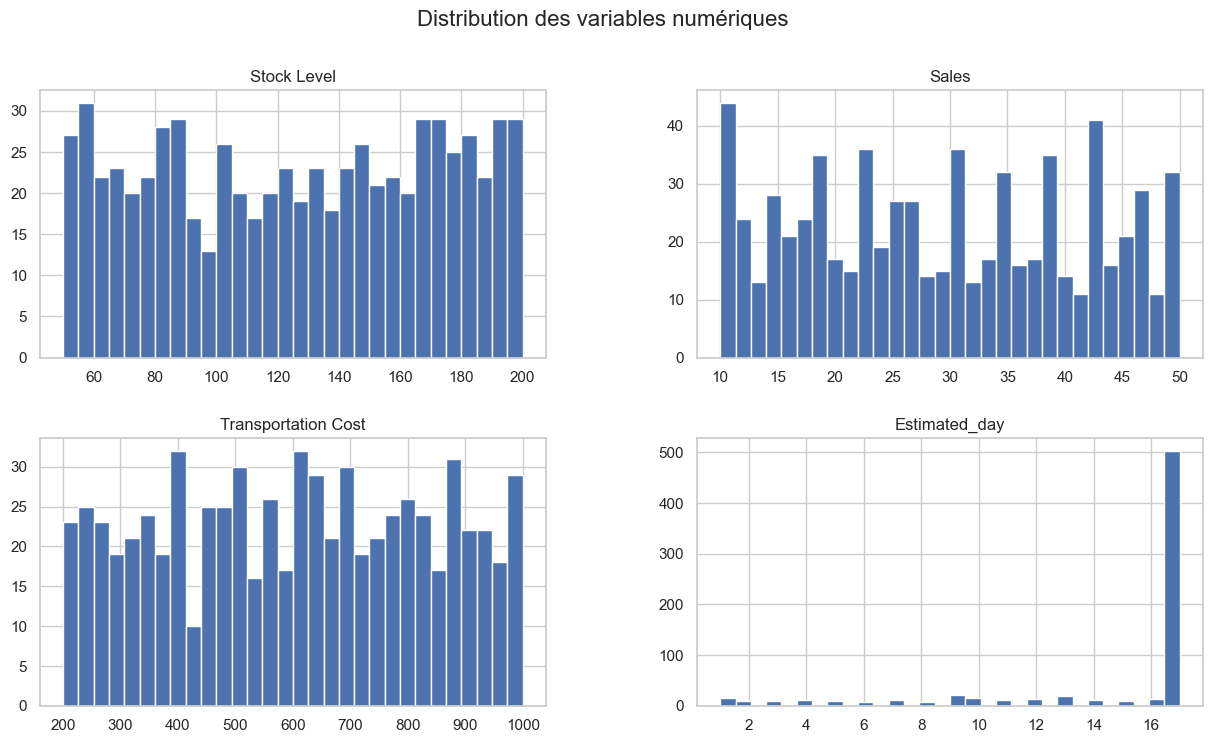

In [52]:
chain[num_col].describe()
chain[num_col].hist(bins=30, figsize=(15,8))
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

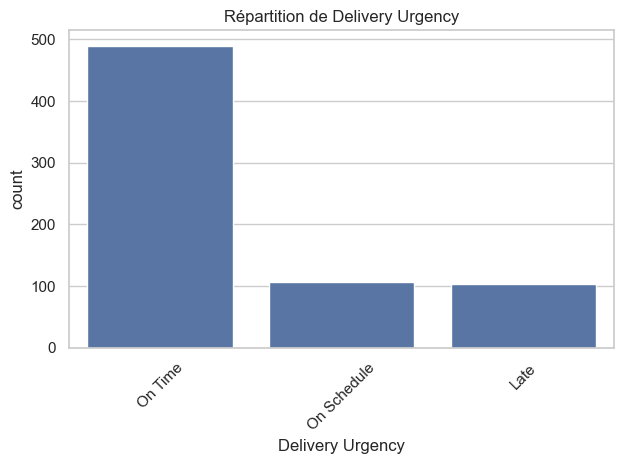

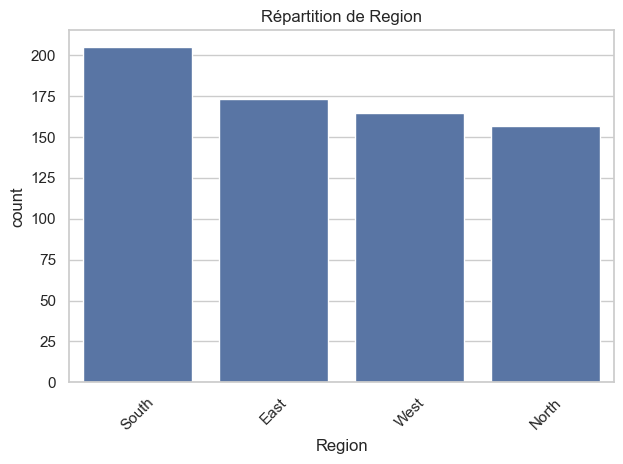

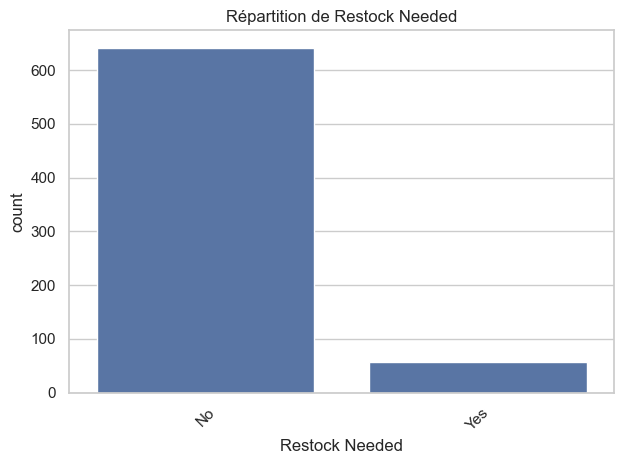

In [53]:
for col in cat_col: 
    sns.countplot(data=chain, x=col, order=chain[col].value_counts().index)
    plt.title(f"Répartition de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Analyse bivariée

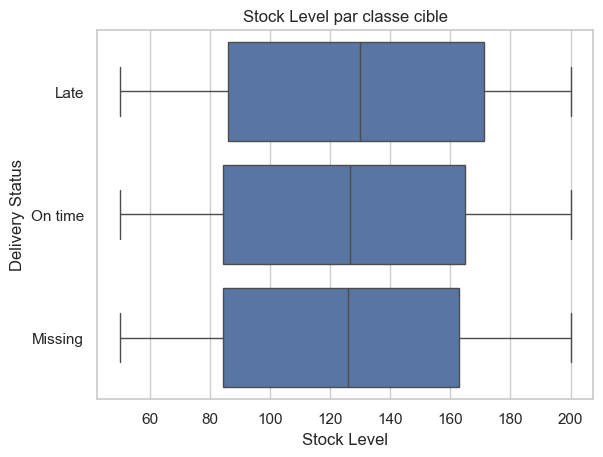

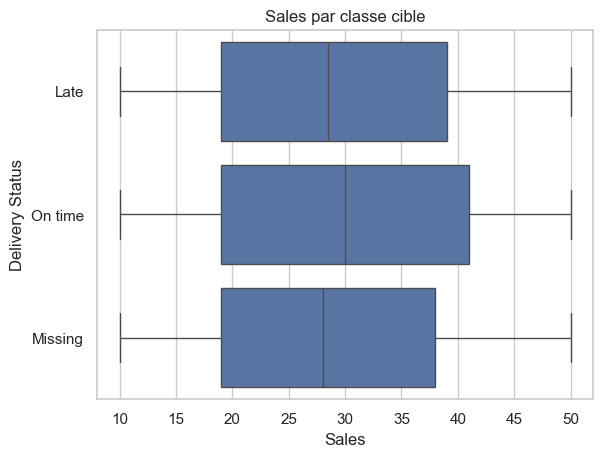

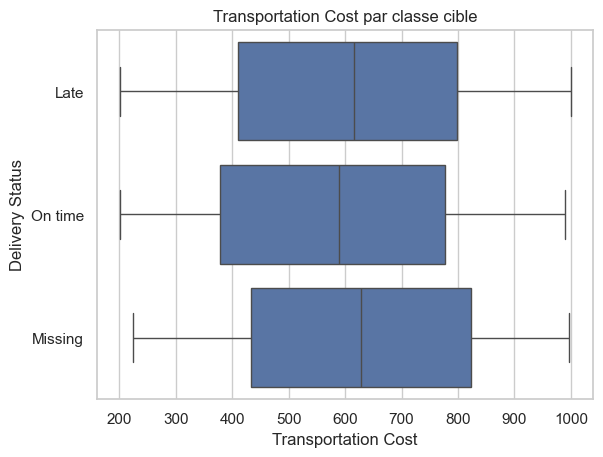

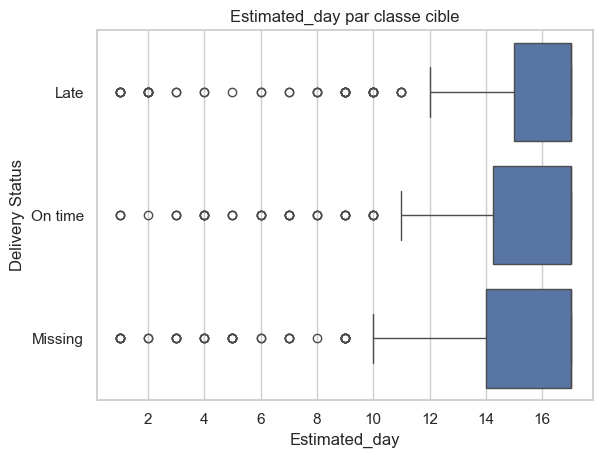

In [54]:
for col in num_col: 
    sns.boxplot(data=chain, x=col, y=target)
    plt.title(f"{col} par classe cible")
    plt.show()

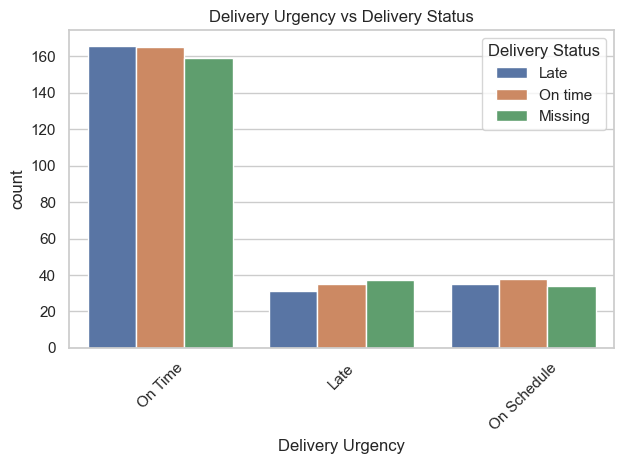

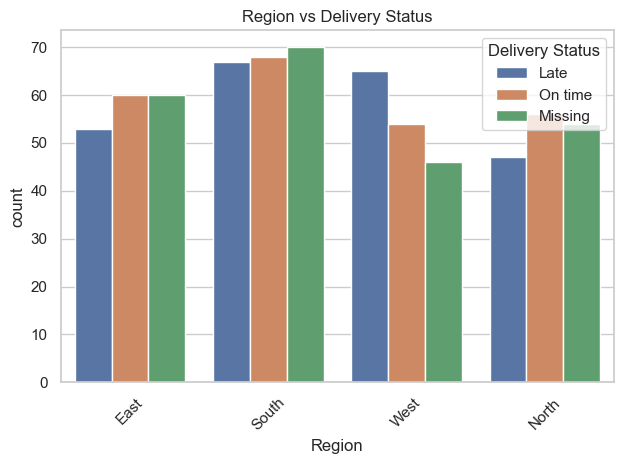

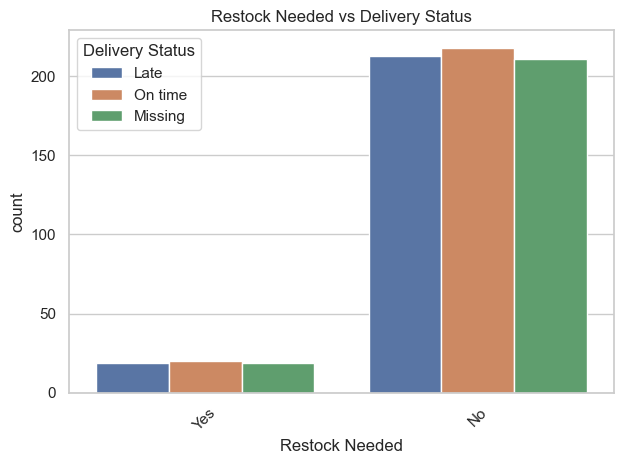

In [55]:
for col in cat_col:
    sns.countplot(chain, x=col, hue=target)
    plt.title(f"{col} vs Delivery Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

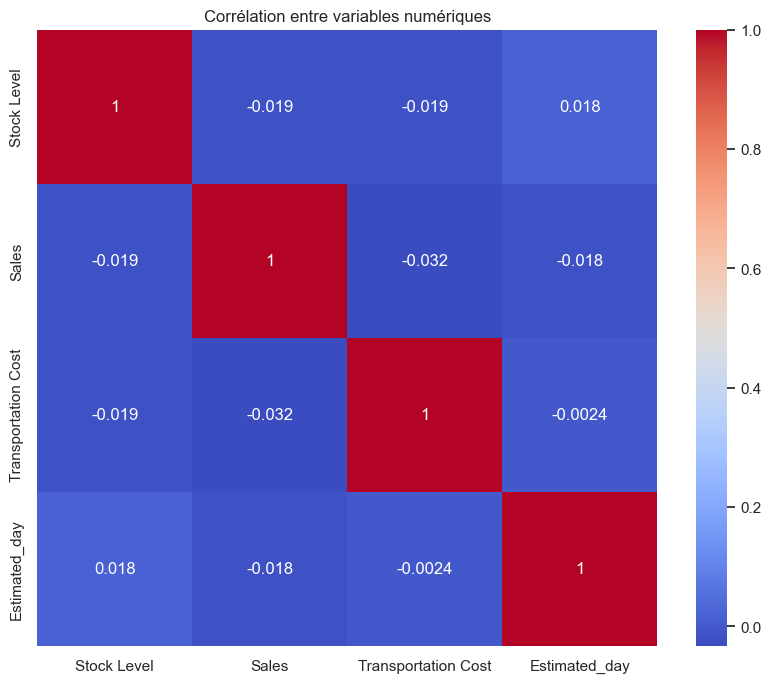

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(chain[num_col].corr(),annot=True, cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()

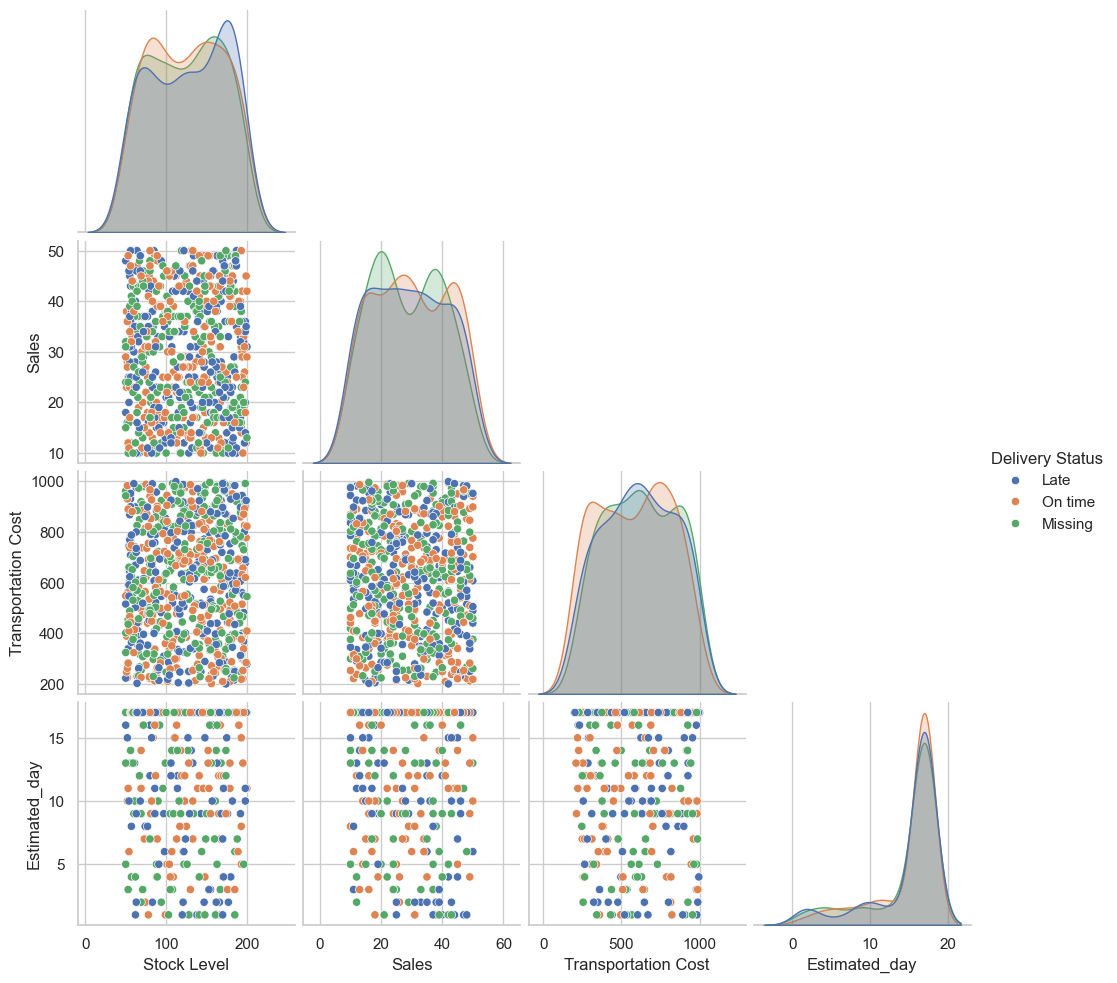

In [62]:
sns.pairplot(chain, hue="Delivery Status", diag_kind='kde', corner=True)
plt.show()